1. CARGAMOS Y EXPLORAMOS EL DATASET I

In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel("online_retail_II, transacciones de comercio electronico.xlsx")

df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


2. ANALISIS

In [3]:
#2.1 Dimensiones del dataset
df.shape


(525461, 8)

In [4]:
#2.2 Valores nulos
df.isnull().sum().sort_values(ascending=False)


Customer ID    107927
Description      2928
StockCode           0
Invoice             0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [5]:
#Se eliminaron registros sin identificador de cliente para garantizar coherencia en análisis segmentado.
df = df.dropna(subset=["Customer ID"])


In [6]:
#2.3 Duplicados
df.duplicated().sum()


np.int64(6771)

In [7]:
df = df.drop_duplicates()


3 ELIMINAR CANTIDADES O PRECIOS NO VALIDOS

In [8]:
#3.1 Filtrar cantidades negativas
df = df[df["Quantity"] > 0]


In [9]:
#Filtro precios negativos
df = df[df["Price"] > 0]



4 CONVERSTION DE TIPO DE DATOS

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 400916 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      400916 non-null  object        
 1   StockCode    400916 non-null  object        
 2   Description  400916 non-null  object        
 3   Quantity     400916 non-null  int64         
 4   InvoiceDate  400916 non-null  datetime64[ns]
 5   Price        400916 non-null  float64       
 6   Customer ID  400916 non-null  float64       
 7   Country      400916 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.5+ MB


In [11]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


5 CREO VARIABLES DERIVADAS

In [12]:
df["Total_Amount"] = df["Quantity"] * df["Price"]
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["DayOfWeek"] = df["InvoiceDate"].dt.day_name()
df["Hour"] = df["InvoiceDate"].dt.hour


In [13]:
df.shape
df.columns


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Total_Amount', 'Year', 'Month',
       'Day', 'DayOfWeek', 'Hour'],
      dtype='object')

6 ANALIZAMOS QUE TODO ESTE CORRECTO

In [14]:
df.describe()


,Quantity,InvoiceDate,Price,Customer ID,Total_Amount,Year,Month,Day,Hour
count,400916.000000,400916,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000
mean,13.767418,2010-07-01 05:01:16.167027712,3.305826,15361.544074,21.945330,2009.924493,7.398166,15.365368,12.865191
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000,2009.000000,1.000000,1.000000,7.000000
25%,2.000000,2010-03-26 13:28:00,1.250000,13985.000000,5.000000,2010.000000,4.000000,8.000000,11.000000
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000,12.500000,2010.000000,8.000000,15.000000,13.000000
75%,12.000000,2010-10-14 13:58:45,3.750000,16805.000000,19.500000,2010.000000,11.000000,23.000000,14.000000
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000,2010.000000,12.000000,31.000000,20.000000
std,97.638385,NaN,35.047719,1680.635823,77.758075,0.264208,3.472188,8.735086,2.306906


7 VER DISTRIBUCION

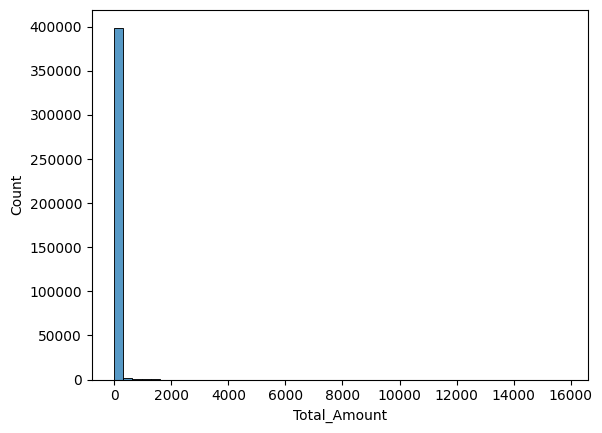

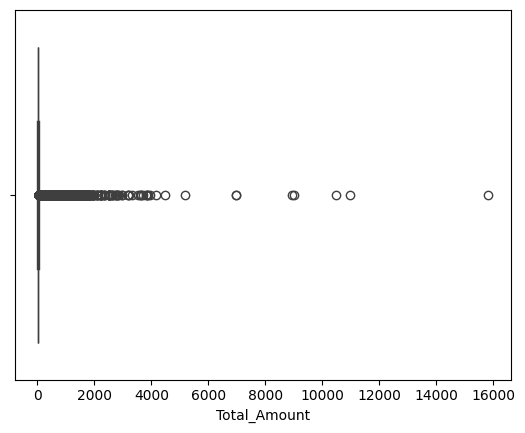

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Total_Amount"], bins=50)
plt.show()

sns.boxplot(x=df["Total_Amount"])
plt.show()


Se observan valores elevados en la distribución de Total_Amount, correspondientes a compras de gran volumen. Se decidió mantener estos registros al considerarse transacciones reales propias del negocio.

1 CARGA Y LIMPIEZA DEL DATASET II

In [16]:
df2 = pd.read_csv("sales_data.csv")

df2.head()
df2.info()
df2.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


2 REVISAMOS VALORES NULOS

In [17]:
df2.isnull().sum().sort_values(ascending=False)


Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

No hay valores nulos

3 BUSCAMOS DUPLICADOS

In [18]:
df2.duplicated().sum()


np.int64(0)

4 REVISAMOS CONSISTENCIA DE COLUMNAS CLAVE

In [19]:
#Buscamos valores unicos
df2["Region"].unique()


array(['North', 'West', 'South', 'East'], dtype=object)

In [20]:
#Verificamos países únicos
df["Country"].unique()


array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

In [21]:
#Voi a clasificar los países por regiones
region_map = {
    # WEST
    "United Kingdom": "West",
    "France": "West",
    "Belgium": "West",
    "Netherlands": "West",
    "Channel Islands": "West",
    "EIRE": "West",
    "West Indies": "West",
    "Unspecified": "West",
    
    # NORTH
    "Germany": "North",
    "Denmark": "North",
    "Sweden": "North",
    "Norway": "North",
    "Finland": "North",
    "Iceland": "North",
    "USA": "North",
    "Canada": "North",
    
    # SOUTH
    "Spain": "South",
    "Portugal": "South",
    "Italy": "South",
    "Greece": "South",
    "Cyprus": "South",
    "Malta": "South",
    "Australia": "South",
    "Brazil": "South",
    "Nigeria": "South",
    "RSA": "South",
    
    # EAST
    "Poland": "East",
    "Austria": "East",
    "Lithuania": "East",
    "Japan": "East",
    "Singapore": "East",
    "Thailand": "East",
    "Israel": "East",
    "Korea": "East",
    "United Arab Emirates": "East",
    "Bahrain": "East"
}

df["Region"] = df["Country"].map(region_map)


In [22]:
#Verificamos la nueva columna de regiones
df["Region"].isnull().sum()


np.int64(1170)

In [23]:
#Buscamos qué países no se clasificaron en regiones
df[df["Region"].isnull()]["Country"].unique()


array(['Switzerland'], dtype=object)

In [24]:
#Agregamos manualmente los países no clasificados
region_map["Switzerland"] = "North"


In [25]:
#Verificamos que ya no haya países sin región asignada
df["Region"] = df["Country"].map(region_map)


In [26]:
df["Region"].isnull().sum()


np.int64(0)

5 REVISAR TIPOS NUMERICOS

In [27]:
df2.dtypes


Product_ID                int64
Sale_Date                object
Sales_Rep                object
Region                   object
Sales_Amount            float64
Quantity_Sold             int64
Product_Category         object
Unit_Cost               float64
Unit_Price              float64
Customer_Type            object
Discount                float64
Payment_Method           object
Sales_Channel            object
Region_and_Sales_Rep     object
dtype: object

In [28]:
df2["Sales_Amount"] = pd.to_numeric(df2["Sales_Amount"], errors="coerce")


6 CREAR METRICAS AGREGADAS POR REGION

In [29]:
#Como este dataset tiene solo 1000 filas, lo convertimos en una tabla resumen por región
df2_region = df2.groupby("Region").agg({
    "Sales_Amount": "mean",
    "Unit_Cost": "mean",
    "Unit_Price": "mean",
    "Discount": "mean"
}).reset_index()


7 VERIFICAMOS RESULTADOS

In [30]:
df2_region.head()
df2_region.shape


(4, 5)

HACEMOS EL MERGE

In [31]:
df_final = df.merge(df2_region, on="Region", how="left")


In [32]:
#Verificamos que esta bien
df.shape
df_final.shape


(400916, 19)

In [33]:
#Verificamos que no se generaron filas adicionales
df_final.isnull().sum()


Invoice         0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
Price           0
Customer ID     0
Country         0
Total_Amount    0
Year            0
Month           0
Day             0
DayOfWeek       0
Hour            0
Region          0
Sales_Amount    0
Unit_Cost       0
Unit_Price      0
Discount        0
dtype: int64

Se realizó una unión tipo left join utilizando la variable Region como clave, manteniendo todas las transacciones del dataset principal y enriqueciendo cada registro con métricas agregadas regionales del segundo conjunto de datos.

In [34]:
#Voi a crear columnas para llegar al requisito de las 20 columnas
df_final["Margin_Estimated"] = df_final["Unit_Price"] - df_final["Unit_Cost"]

df_final["Revenue_per_Unit"] = df_final["Total_Amount"] / df_final["Quantity"]

df_final["Discounted_Revenue"] = df_final["Total_Amount"] * (1 - df_final["Discount"])


In [35]:
df_final.shape


(400916, 22)

VALIDACION FINAL

In [36]:
df_final.info()
df_final.describe()
df_final.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400916 entries, 0 to 400915
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Invoice             400916 non-null  object        
 1   StockCode           400916 non-null  object        
 2   Description         400916 non-null  object        
 3   Quantity            400916 non-null  int64         
 4   InvoiceDate         400916 non-null  datetime64[ns]
 5   Price               400916 non-null  float64       
 6   Customer ID         400916 non-null  float64       
 7   Country             400916 non-null  object        
 8   Total_Amount        400916 non-null  float64       
 9   Year                400916 non-null  int32         
 10  Month               400916 non-null  int32         
 11  Day                 400916 non-null  int32         
 12  DayOfWeek           400916 non-null  object        
 13  Hour                400916 no

Invoice               0
StockCode             0
Description           0
Quantity              0
InvoiceDate           0
Price                 0
Customer ID           0
Country               0
Total_Amount          0
Year                  0
Month                 0
Day                   0
DayOfWeek             0
Hour                  0
Region                0
Sales_Amount          0
Unit_Cost             0
Unit_Price            0
Discount              0
Margin_Estimated      0
Revenue_per_Unit      0
Discounted_Revenue    0
dtype: int64

ANALISIS EXHAUSTIVO

In [37]:
#Resumen general del dataset final
df_final.describe()


,Quantity,InvoiceDate,Price,Customer ID,Total_Amount,Year,Month,Day,Hour,Sales_Amount,Unit_Cost,Unit_Price,Discount,Margin_Estimated,Revenue_per_Unit,Discounted_Revenue
count,400916.000000,400916,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000,400916.000000
mean,13.767418,2010-07-01 05:01:16.167027712,3.305826,15361.544074,21.945330,2009.924493,7.398166,15.365368,12.865191,5065.173638,2505.674301,2761.295922,0.148414,255.621621,3.305826,18.687398
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000,2009.000000,1.000000,1.000000,7.000000,4790.087186,2444.725442,2703.611593,0.148319,246.177903,0.001000,0.000850
25%,2.000000,2010-03-26 13:28:00,1.250000,13985.000000,5.000000,2010.000000,4.000000,8.000000,11.000000,5063.971025,2507.794877,2763.663279,0.148320,255.868402,1.250000,4.258402
50%,5.000000,2010-07-09 10:26:00,1.950000,15311.000000,12.500000,2010.000000,8.000000,15.000000,13.000000,5063.971025,2507.794877,2763.663279,0.148320,255.868402,1.950000,10.646004
75%,12.000000,2010-10-14 13:58:45,3.750000,16805.000000,19.500000,2010.000000,11.000000,23.000000,14.000000,5063.971025,2507.794877,2763.663279,0.148320,255.868402,3.750000,16.607766
max,19152.000000,2010-12-09 20:01:00,10953.500000,18287.000000,15818.400000,2010.000000,12.000000,31.000000,20.000000,5129.634869,2507.794877,2763.663279,0.162548,258.886150,10953.500000,13472.220098
std,97.638385,NaN,35.047719,1680.635823,77.758075,0.264208,3.472188,8.735086,2.306906,21.452515,10.112214,11.135968,0.000945,1.647392,35.047719,66.210926


In [38]:
#Información general del dataset final
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400916 entries, 0 to 400915
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Invoice             400916 non-null  object        
 1   StockCode           400916 non-null  object        
 2   Description         400916 non-null  object        
 3   Quantity            400916 non-null  int64         
 4   InvoiceDate         400916 non-null  datetime64[ns]
 5   Price               400916 non-null  float64       
 6   Customer ID         400916 non-null  float64       
 7   Country             400916 non-null  object        
 8   Total_Amount        400916 non-null  float64       
 9   Year                400916 non-null  int32         
 10  Month               400916 non-null  int32         
 11  Day                 400916 non-null  int32         
 12  DayOfWeek           400916 non-null  object        
 13  Hour                400916 no

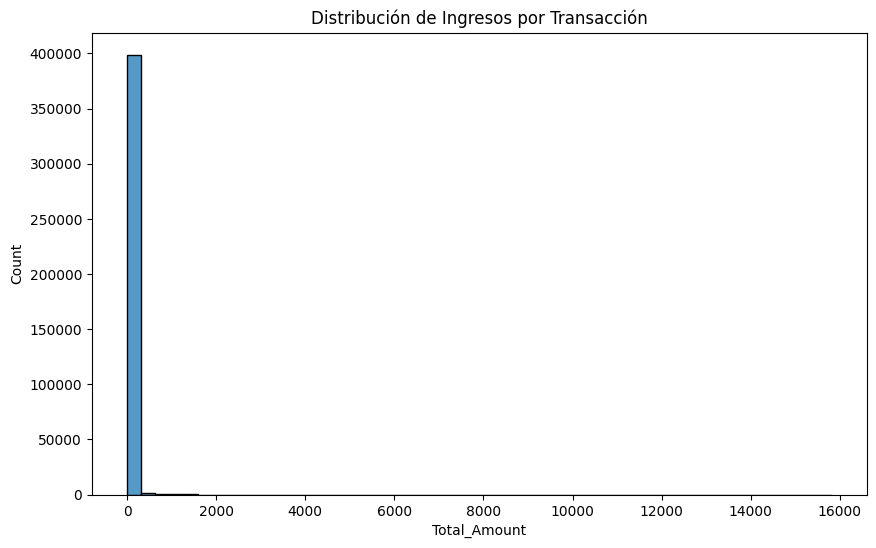

In [39]:
#Distribuciion de ingresos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df_final["Total_Amount"], bins=50)
plt.title("Distribución de Ingresos por Transacción")
plt.show()


La distribución de los ingresos por transacción presenta una fuerte asimetría positiva, concentrándose la mayoría de las ventas en importes bajos, mientras que existen transacciones de alto volumen que generan una cola larga hacia la derecha. Este comportamiento es típico en datos de comercio minorista.

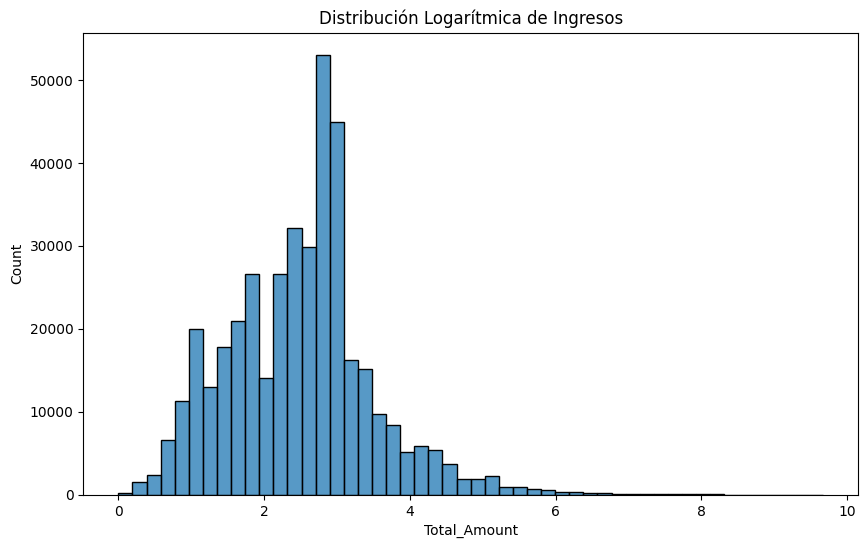

In [40]:
plt.figure(figsize=(10,6))
sns.histplot(np.log1p(df_final["Total_Amount"]), bins=50)
plt.title("Distribución Logarítmica de Ingresos")
plt.show()


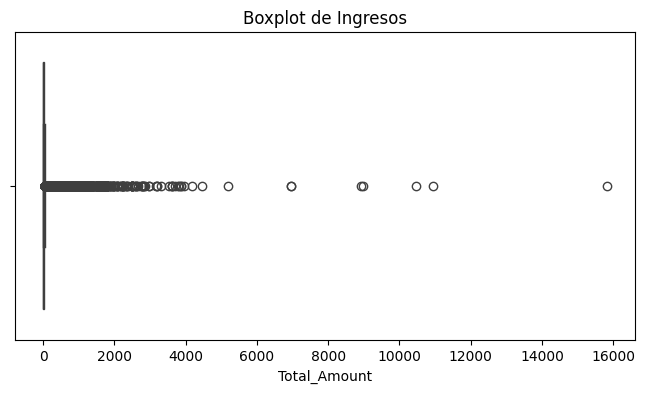

In [41]:
#Bloxplot de ingresos
plt.figure(figsize=(8,4))
sns.boxplot(x=df_final["Total_Amount"])
plt.title("Boxplot de Ingresos")
plt.show()


El boxplot confirma la presencia de numerosos valores extremos hacia la derecha, lo que indica una alta dispersión en los ingresos por transacción. Este comportamiento es coherente con la existencia de compras de gran volumen dentro del negocio. Se decidió mantener estos valores al considerarse representativos de la actividad comercial real.

In [42]:
#Ventas totales por region
ventas_region = df_final.groupby("Region")["Total_Amount"].sum().reset_index()
ventas_region


,Region,Total_Amount
0,East,51129.430
1,North,388651.711
2,South,150308.000
3,West,8208144.603


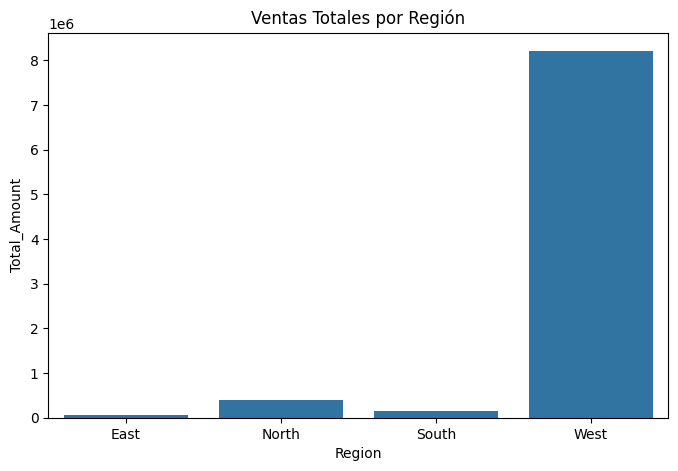

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=ventas_region, x="Region", y="Total_Amount")
plt.title("Ventas Totales por Región")
plt.show()


La región West concentra la mayor parte de los ingresos totales, superando ampliamente al resto de regiones. Este resultado se explica principalmente por el elevado volumen de transacciones provenientes del Reino Unido, que constituye el mercado principal del dataset analizado. Las regiones East y South presentan una contribución significativamente menor al volumen total de ventas.

In [44]:
#Promedio de ingresos por región
media_region = df_final.groupby("Region")["Total_Amount"].mean().reset_index()

media_region


,Region,Total_Amount
0,East,30.058454
1,North,34.732056
2,South,30.544198
3,West,21.425369


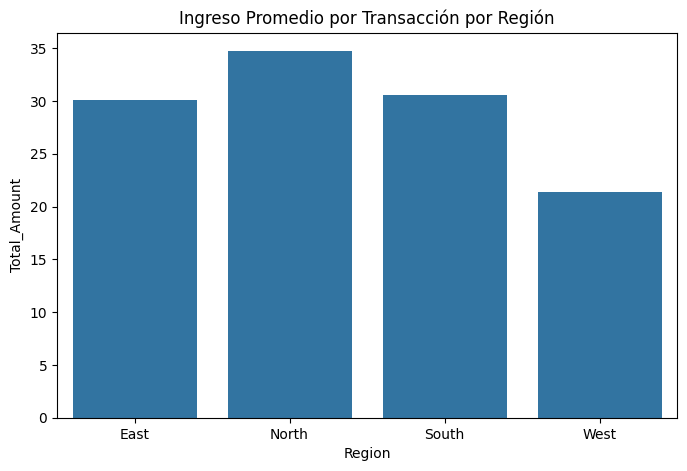

In [45]:
plt.figure(figsize=(8,5))
sns.barplot(data=media_region, x="Region", y="Total_Amount")
plt.title("Ingreso Promedio por Transacción por Región")
plt.show()


Aunque la región West concentra el mayor volumen total de ingresos, el análisis del ingreso promedio por transacción revela que la región North presenta el ticket medio más elevado. Esto indica que West domina por volumen de operaciones, mientras que North destaca por el tamaño medio de cada transacción.

In [46]:
#Ventas por mes
df_final["YearMonth"] = df_final["InvoiceDate"].dt.to_period("M")


In [47]:
ventas_mensuales = df_final.groupby("YearMonth")["Total_Amount"].sum().reset_index()

ventas_mensuales["YearMonth"] = ventas_mensuales["YearMonth"].astype(str)


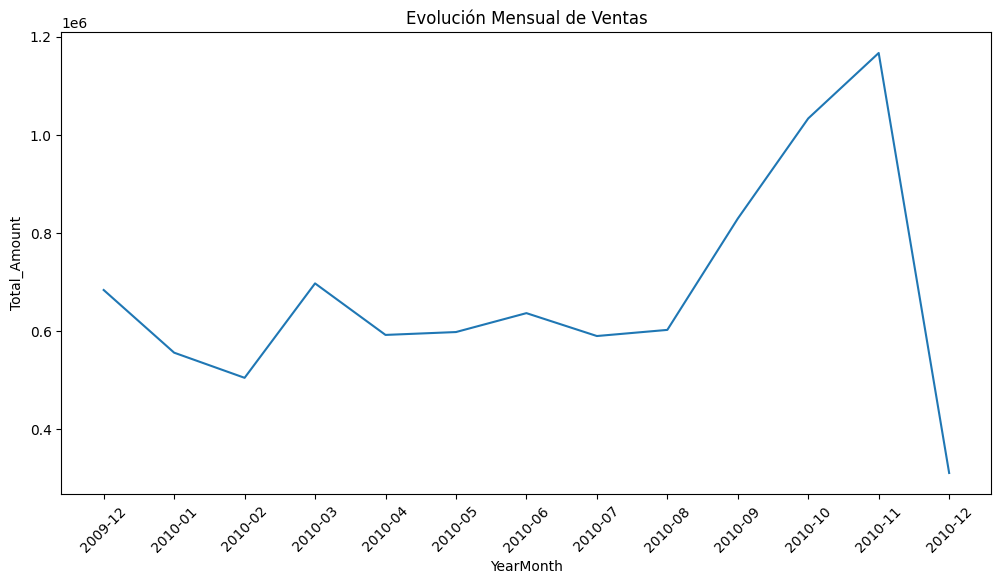

In [48]:
plt.figure(figsize=(12,6))
sns.lineplot(data=ventas_mensuales, x="YearMonth", y="Total_Amount")
plt.xticks(rotation=45)
plt.title("Evolución Mensual de Ventas")
plt.show()


Se observa un crecimiento significativo de las ventas durante el último trimestre del año, alcanzando su punto máximo en noviembre de 2010. Este comportamiento sugiere un efecto estacional vinculado a campañas previas a Navidad. La caída en diciembre puede explicarse por la posible incompletitud de los datos para dicho mes.

In [49]:
#Top productos
top_productos = df_final.groupby("StockCode")["Total_Amount"].sum().reset_index()

top_productos = top_productos.sort_values(by="Total_Amount", ascending=False).head(10)

top_productos


,StockCode,Total_Amount
3624,85123A,151339.16
1489,22423,143727.60
4011,M,98531.99
3615,85099B,85257.45
2478,84879,70291.03
4013,POST,48741.08
1008,21843,41457.64
2176,48138,41223.56
2325,84347,40156.05
1179,22086,36871.55


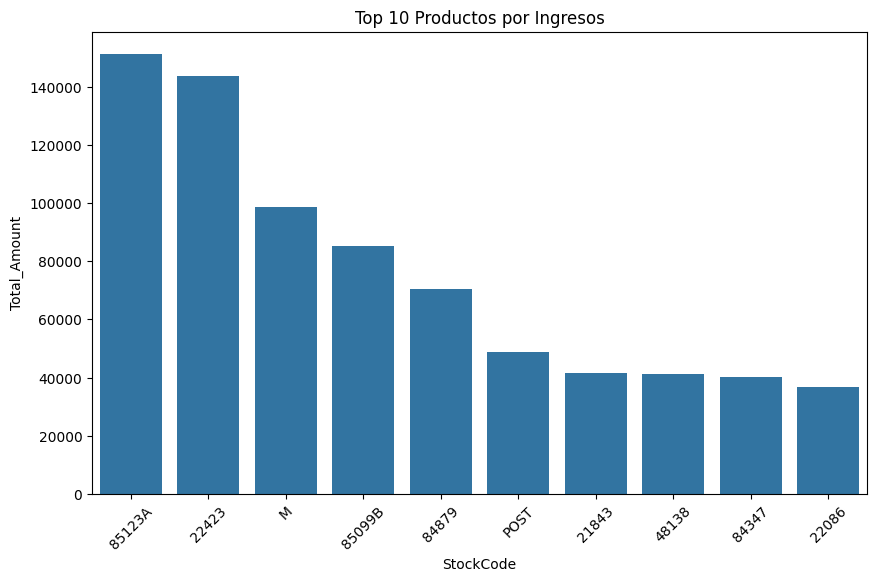

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_productos, x="StockCode", y="Total_Amount")
plt.xticks(rotation=45)
plt.title("Top 10 Productos por Ingresos")
plt.show()


El análisis de los productos con mayor volumen de ingresos revela una fuerte concentración en un número reducido de referencias. Los dos productos principales generan una proporción significativamente mayor de ingresos respecto al resto, lo que sugiere un comportamiento consistente con el principio de Pareto (80/20). Este patrón indica una alta dependencia de productos clave dentro del portafolio.

In [51]:
#Cantidad vendida vs ingresos
top_cantidad = df_final.groupby("StockCode")["Quantity"].sum().reset_index()

top_cantidad = top_cantidad.sort_values(by="Quantity", ascending=False).head(10)

top_cantidad


,StockCode,Quantity
482,21212,57505
3624,85123A,56814
2309,84077,54610
3615,85099B,48731
49,17003,48166
2478,84879,44431
2519,84991,35656
1100,21977,30871
1286,22197,28773
2103,37410,25685


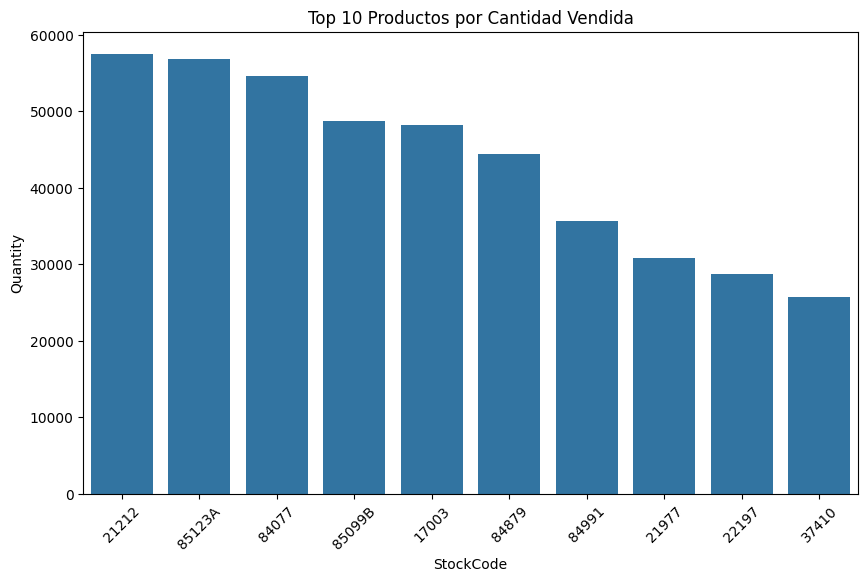

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_cantidad, x="StockCode", y="Quantity")
plt.xticks(rotation=45)
plt.title("Top 10 Productos por Cantidad Vendida")
plt.show()


El análisis comparativo entre ingresos totales y cantidad vendida revela diferencias relevantes en el comportamiento de los productos. Algunos artículos destacan por su alta rotación (elevado volumen de unidades vendidas), mientras que otros generan mayores ingresos debido a su mayor precio unitario. Esto evidencia la coexistencia de productos de volumen y productos de valor dentro del portafolio.

In [53]:
#Precio promedio por producto
precio_promedio = df_final.groupby("StockCode")["Price"].mean().reset_index()

top_precio = precio_promedio.sort_values(by="Price", ascending=False).head(10)

top_precio


,StockCode,Price
1710,22655,295.000000
1711,22656,295.000000
4007,ADJUST2,243.683333
4011,M,229.954024
1874,22827,159.545455
1875,22828,153.000000
940,21760,116.923077
1871,22823,116.000000
4006,ADJUST,110.578750
2550,85070,106.666667


In [54]:
#Analisis de margen
df_final["Margin_Estimated"] = df_final["Unit_Price"] - df_final["Unit_Cost"]


In [55]:
#Margen promedio por región
margen_region = df_final.groupby("Region")["Margin_Estimated"].mean().reset_index()

margen_region


,Region,Margin_Estimated
0,East,252.722091
1,North,246.177903
2,South,258.886150
3,West,255.868402


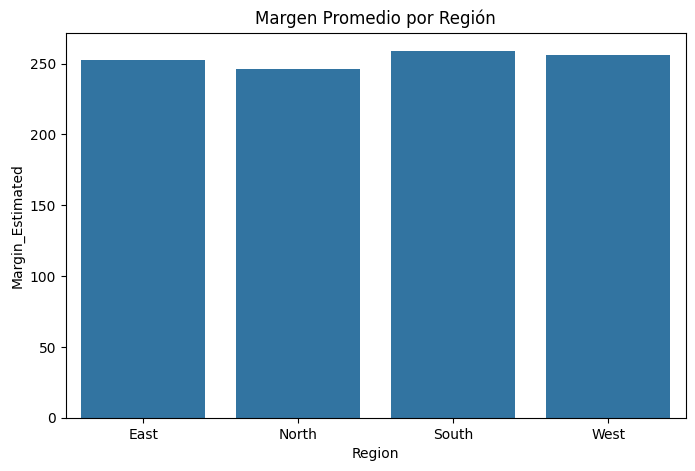

In [56]:
plt.figure(figsize=(8,5))
sns.barplot(data=margen_region, x="Region", y="Margin_Estimated")
plt.title("Margen Promedio por Región")
plt.show()


El análisis del margen promedio por región muestra diferencias poco significativas entre zonas geográficas. Esto indica que la estructura de precios y costes es relativamente homogénea, y que las diferencias en ingresos totales se explican principalmente por el volumen de transacciones y no por variaciones en la rentabilidad unitaria.

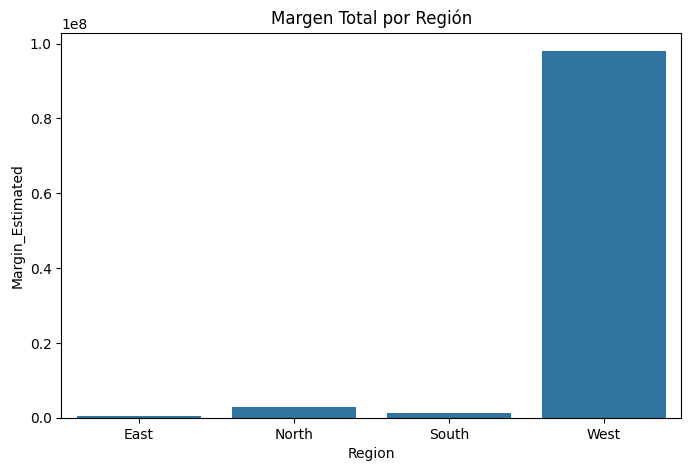

In [57]:
margen_total_region = df_final.groupby("Region")["Margin_Estimated"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=margen_total_region, x="Region", y="Margin_Estimated")
plt.title("Margen Total por Región")
plt.show()


El margen total por región muestra una fuerte concentración en la región West, lo cual se explica por el elevado volumen de ventas en dicha zona. Dado que el margen promedio es relativamente homogéneo entre regiones, las diferencias en rentabilidad total responden principalmente al volumen de operaciones y no a diferencias estructurales en precios o costes.

In [58]:
#Analisis por cliente
ventas_cliente = df_final.groupby("Customer ID")["Total_Amount"].sum().reset_index()

ventas_cliente = ventas_cliente.sort_values(by="Total_Amount", ascending=False)

ventas_cliente.head(10)


,Customer ID,Total_Amount
4183,18102.0,349164.35
1637,14646.0,248396.50
1269,14156.0,196549.74
1840,14911.0,152121.22
939,13694.0,131443.19
3744,17511.0,84541.17
1951,15061.0,83284.38
3128,16684.0,80489.21
3177,16754.0,65500.07
4065,17949.0,60117.60


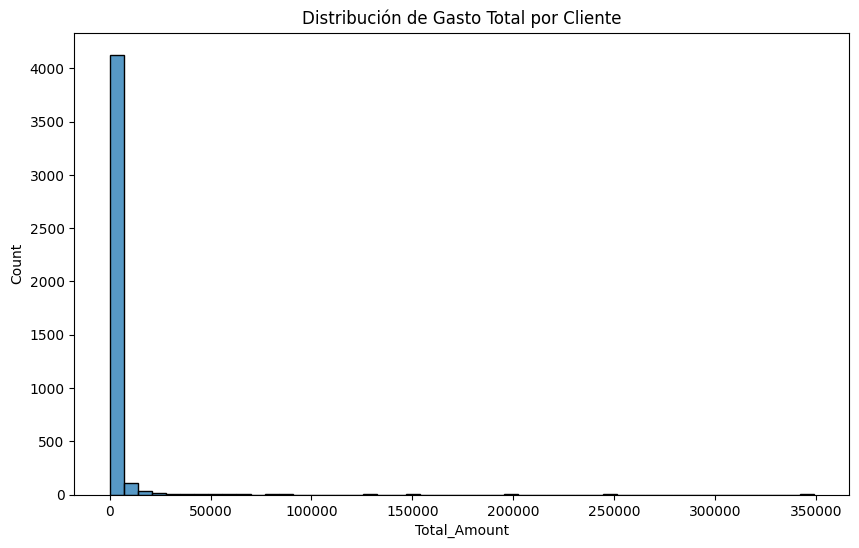

In [59]:
#Distribucion de gasto por cliente
plt.figure(figsize=(10,6))
sns.histplot(ventas_cliente["Total_Amount"], bins=50)
plt.title("Distribución de Gasto Total por Cliente")
plt.show()


La distribución del gasto total por cliente presenta una fuerte asimetría positiva, con una elevada concentración de ingresos en un número reducido de clientes de alto valor. Este comportamiento sugiere una posible estructura mixta entre clientes minoristas y mayoristas, evidenciando dependencia significativa de cuentas estratégicas.

In [60]:
ventas_cliente_sorted = ventas_cliente.sort_values(by="Total_Amount", ascending=False)

top_10_clientes = ventas_cliente_sorted.head(10)

top_10_clientes


,Customer ID,Total_Amount
4183,18102.0,349164.35
1637,14646.0,248396.50
1269,14156.0,196549.74
1840,14911.0,152121.22
939,13694.0,131443.19
3744,17511.0,84541.17
1951,15061.0,83284.38
3128,16684.0,80489.21
3177,16754.0,65500.07
4065,17949.0,60117.60


In [61]:
porcentaje_top10 = top_10_clientes["Total_Amount"].sum() / ventas_cliente["Total_Amount"].sum() * 100

porcentaje_top10


np.float64(16.49885047655083)

Los 10 clientes con mayor volumen de gasto concentran aproximadamente el 16,5% de los ingresos totales. Si bien existe cierta concentración, el negocio no muestra una dependencia excesiva de un número reducido de clientes, lo que sugiere una estructura relativamente diversificada de la base de ingresos.

BLOQUE FINAL

Distribución de ingresos

La distribución de los ingresos por transacción presenta una fuerte asimetría positiva, concentrándose la mayoría de las ventas en importes bajos y existiendo una cola larga de transacciones de alto valor. Este patrón es característico del comercio minorista y refleja la coexistencia de compras pequeñas y operaciones de mayor volumen.

Análisis por región

La región West concentra la mayor parte del volumen total de ingresos, debido principalmente al elevado número de transacciones registradas en el Reino Unido. Sin embargo, el ingreso promedio por transacción es mayor en la región North, lo que indica que West domina por volumen y no por tamaño medio de operación.

El margen promedio por región es relativamente homogéneo, lo que sugiere una estructura de precios y costes consistente entre zonas geográficas. Por tanto, las diferencias en margen total responden al volumen de ventas y no a variaciones en rentabilidad unitaria.

Evolución temporal

Se observa un crecimiento significativo de las ventas en el último trimestre del año, alcanzando su máximo en noviembre. Este comportamiento sugiere un efecto estacional asociado a campañas comerciales previas a Navidad. La caída observada en diciembre puede estar relacionada con la incompletitud de los datos para dicho periodo.

Análisis de productos

El análisis de productos revela una fuerte concentración de ingresos en un número reducido de referencias, consistente con el principio de Pareto. Asimismo, se identifican diferencias entre productos de alta rotación (gran volumen de unidades vendidas) y productos de mayor valor unitario, lo que indica la coexistencia de estrategias de volumen y de margen dentro del portafolio.

Análisis de clientes

La distribución del gasto por cliente presenta una marcada asimetría positiva, con una concentración moderada de ingresos en los clientes de mayor valor. Los 10 principales clientes representan aproximadamente el 16,5% del total de ingresos, lo que indica una estructura relativamente diversificada sin dependencia crítica de cuentas individuales.

En conjunto, el análisis revela un negocio dominado por volumen en la región West, con estacionalidad marcada en el último trimestre del año, una cartera de productos concentrada en referencias clave y una base de clientes relativamente diversificada. La rentabilidad está impulsada principalmente por el volumen de operaciones más que por diferencias estructurales en margen unitario.

In [64]:
df_final["Quantity"] = pd.to_numeric(df_final["Quantity"], errors="coerce")
df_final["Price"] = pd.to_numeric(df_final["Price"], errors="coerce")


In [65]:
df_final["Total_Amount"] = df_final["Quantity"] * df_final["Price"]


In [66]:
df_final["Total_Amount"].describe()


count    400916.000000
mean         21.945330
std          77.758075
min           0.001000
25%           5.000000
50%          12.500000
75%          19.500000
max       15818.400000
Name: Total_Amount, dtype: float64

In [67]:
df_final[df_final["Total_Amount"] > 100000]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Amount,Year,Month,Day,DayOfWeek,Hour,Region,Revenue_per_Unit,Discounted_Revenue,YearMonth


## Exportación final del dataset para Power BI


In [79]:
df_final.to_csv("dataset_final.csv", index=False, sep=';', decimal=',')
